In [53]:
#Import basic libraries
import pandas as pd
import numpy as np
from tqdm import tqdm
from math import *

#Import visualization libraries
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

#Import sklearn libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error as mse
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_log_error

## Price Prediction
The dataset consists of various parameters such as a unique item ID, category of the market to which a product belongs, category and quality of the product, its demand rate, and its original market price.

__Source__: HackerEarth

__Goal__: build models to predict the lowest price of a product. In this solution I will perform a detailed approach to get the best possible solution

- Hypothesis Testing
- Data Exploration
- Data Cleaning
- Feature Engineering
- Model Buliding

## Hypothesis Testing
Let us have look at the data before coming up with Hypothesis

In [2]:
train = pd.read_csv('Dataset/Train.csv')
train.head()

,Item_Id,Date,State_of_Country,Market_Category,Product_Category,Grade,Demand,Low_Cap_Price,High_Cap_Price
0,IT_1,2007-07-05,0,0,0,0,0.5,2785,4240
1,IT_2,2007-07-05,0,1,0,0,0.7,3574,4756
2,IT_3,2007-07-05,0,103,0,1,1.6,5978,9669
3,IT_4,2007-07-05,0,103,0,0,0.0,5681,8313
4,IT_5,2007-07-05,0,103,0,2,0.0,4924,7257


- Item_Id: Unique item ID
- Date: Date
- State_of_Country: State no. of the country
- Market_Category: Category of the market to which the product belongs to
- Product_Category: Category of the product
- Grade: Quality of the product
- Demand: Demand rate of the product in the market
- Low_Cap_Price[Target]: Lowest price that can be offered 
- High_Cap_Price: Original maximum price in the current market

Hypothesis:

__Store_Level_Hypothesis__:
__State_of_the_Country__: The Low Price that can be offered depends on the state in which the store is located

__State_Population__: The Low Price depends on how densely is the state populated

__Stock_Availability__: Low Price depends on the stock availability of the store

Other factors like Marketing strategy, Location, Customer Behaviour and Ambience of the store affects it's low price

__Product_Level_Hypothesis__: 

__Market_Category__: Low price varies with the category of the market to which the product belongs to
__Product_Category__: Low price varies with the category of the product
__Grade__: Product with high quality has high low_cap_price
__Demand__: More demand rate the low_cap_price is lower
__Uniqueness__: The more unique the product is the high is the low_cap_price

In [3]:
test = pd.read_csv("Dataset/Test.csv")

In [4]:
train_final = train.drop(['Date','Item_Id','Low_Cap_Price'],axis =1)

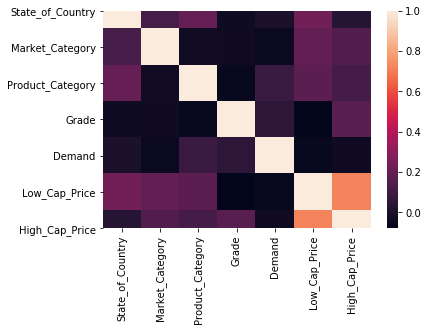

In [29]:
corr = train.corr()
sns.heatmap(corr)

In [31]:
train.head()

,Item_Id,Date,State_of_Country,Market_Category,Product_Category,Grade,Demand,Low_Cap_Price,High_Cap_Price
0,IT_1,2007-07-05,0,0,0,0,0.5,2785,4240
1,IT_2,2007-07-05,0,1,0,0,0.7,3574,4756
2,IT_3,2007-07-05,0,103,0,1,1.6,5978,9669
3,IT_4,2007-07-05,0,103,0,0,0.0,5681,8313
4,IT_5,2007-07-05,0,103,0,2,0.0,4924,7257


In [39]:
#Exploratory Data Analysis
def scatter_plot(feature,target):
    plt.figure(figsize =(16,8))
    plt.scatter(
        train[feature],
        train[target],
        c = 'black')
    plt.xlabel(feature)
    plt.ylabel(target)
    plt.show()
                

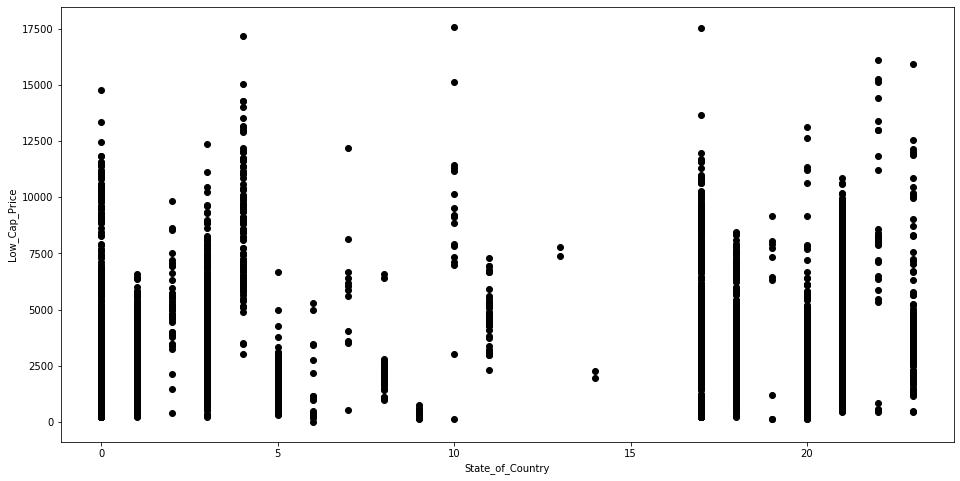

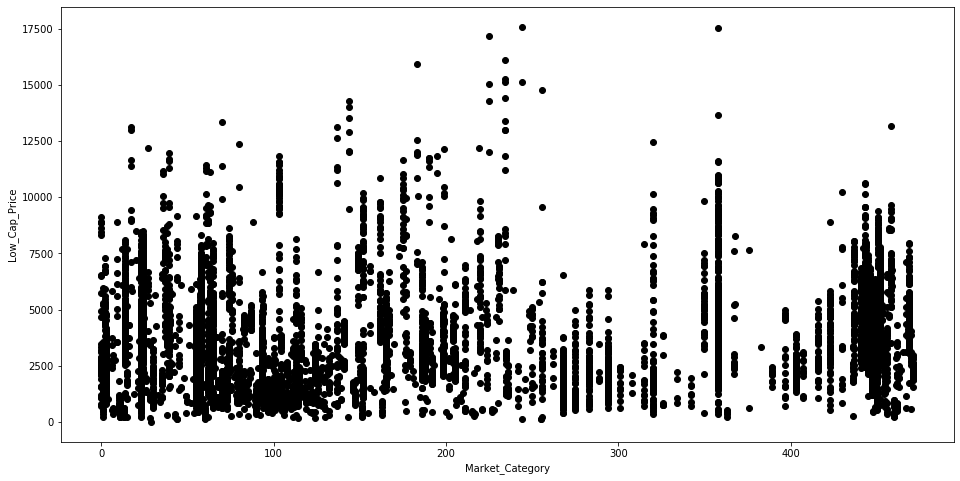

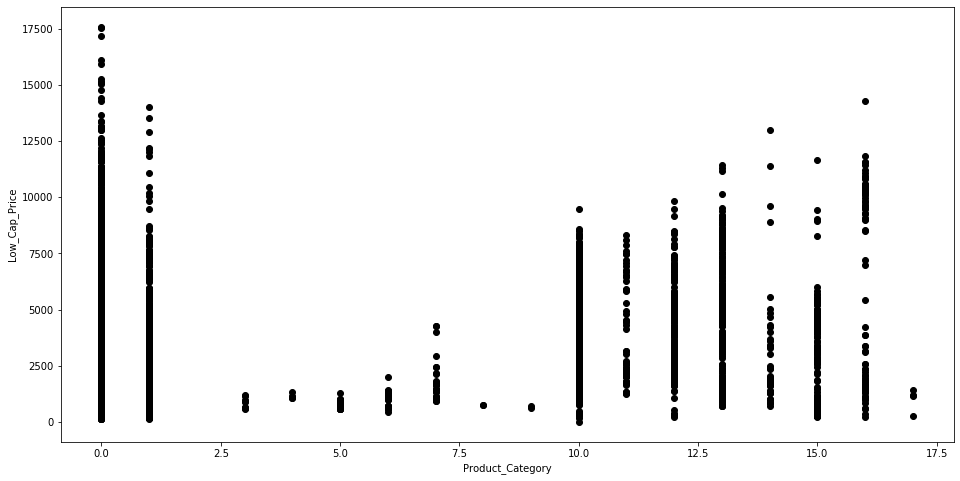

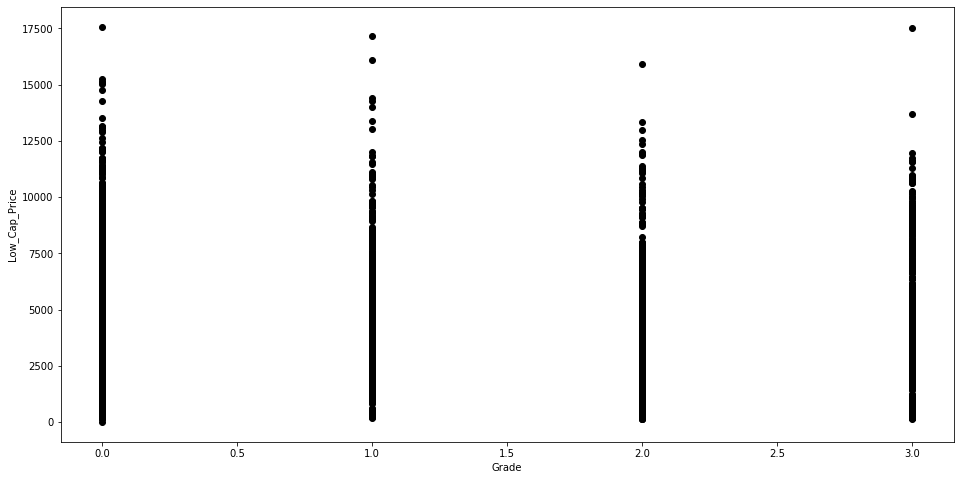

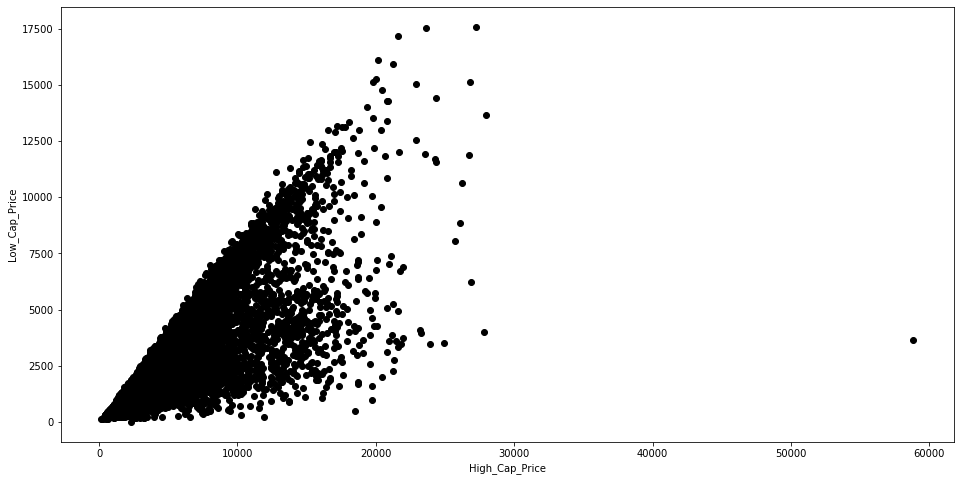

In [41]:
scatter_plot('State_of_Country','Low_Cap_Price')
scatter_plot('Market_Category','Low_Cap_Price')
scatter_plot('Product_Category','Low_Cap_Price')
scatter_plot('Grade','Low_Cap_Price')
scatter_plot('High_Cap_Price','Low_Cap_Price')


In [42]:
#Only variables Low_Cap_Price and High_Cap_Price have high correlation
#Preparing Data for Modelling
X = train_final
y = train['Low_Cap_Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [44]:
#Basic Linear Regression
linear = LinearRegression()


In [88]:
mean_squared_error(y_test,y_pred)

1833591.627295188

In [86]:
score(y_test,y_pred)

0

In [56]:
linear.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [57]:
#Check intercept & coeff value
print(linear.intercept_)
print(linear.coef_)

68.42692326594351
[ 4.70301130e+01  9.54014565e-01  2.66665611e+01 -3.96994890e+02
 -5.13698425e-02  4.36124967e-01]


In [59]:
y_pred = linear.predict(X_test)

In [71]:
df = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
df

,Actual,Predicted
96,2006,2409.847648
39,3755,3170.130023
6642,715,1730.968635
8091,3848,3352.691852
532,3889,4036.670366
...,...,...
5924,6658,5220.964885
8973,7909,5722.755880
1858,4843,4900.014504
9338,1588,3246.215590


In [72]:
new_test = test.drop(['Date','Item_Id'],axis =1)

In [73]:
new_test_pred = linear.predict(new_test)

In [75]:
submission=pd.DataFrame(new_test_pred, columns=['Low_Cap_Price']) 

In [76]:
submission['Item_Id']= test['Item_Id']
submission.head(2)

,Low_Cap_Price,Item_Id
0,2384.054528,IT_265079
1,4105.864280,IT_265087


In [77]:
pd.DataFrame(submission,columns = ['Item_Id','Low_Cap_Price']).to_csv('bl.csv',index = False) 
#The baseline model gave a score of 99.777
#MSE 1833591.627295188

In [ ]:
#